In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
from collections import Counter
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
data = pd.read_csv('datasets/data.csv')
data_by_genres = pd.read_csv('datasets/data_by_genres.csv')

In [3]:
data = data.drop(['id'], axis=1)
data.shape

(170653, 18)

In [4]:
print(data.duplicated().sum())

543


In [5]:
data = data[~data.duplicated(keep='first')]
data.shape

(170110, 18)

<AxesSubplot:>

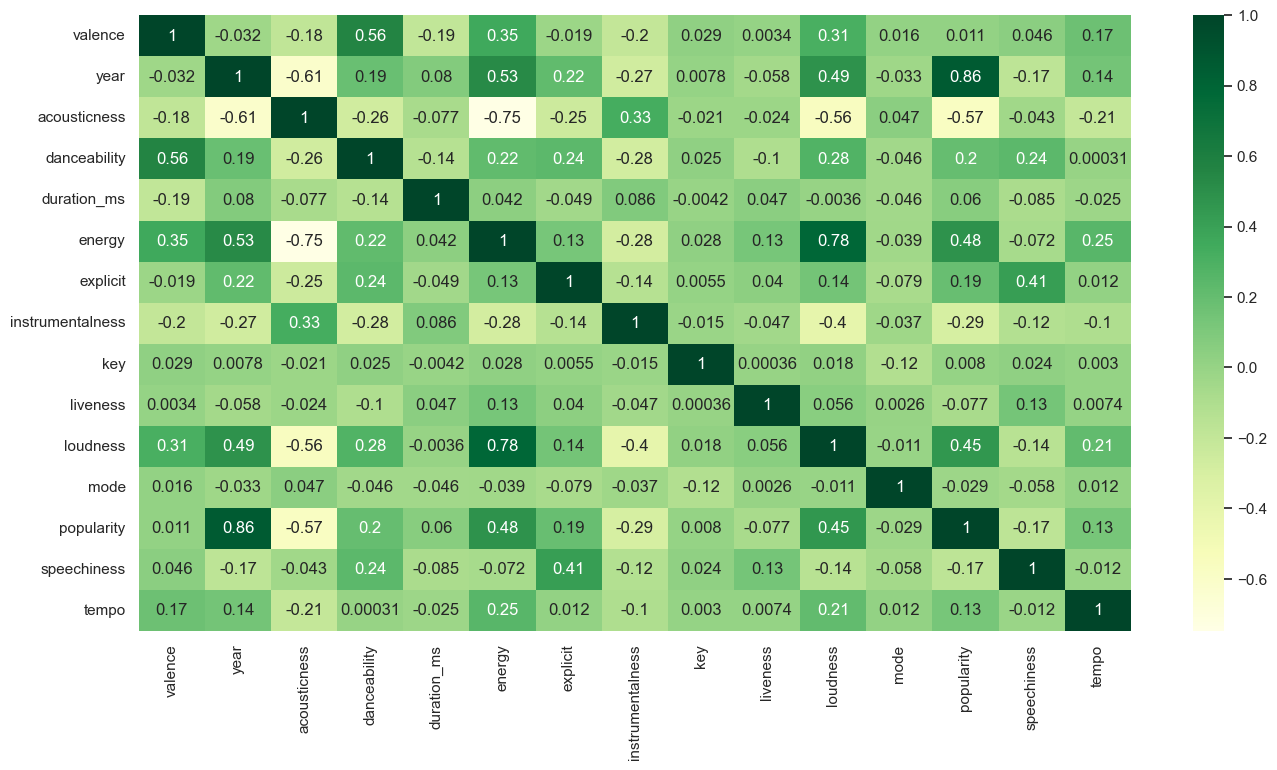

In [6]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap="YlGn")

In [7]:
# Features correlating with popularity
series = np.abs(corr['popularity']).sort_values(ascending=False)
print(series)

popularity          1.000000
year                0.862685
acousticness        0.571490
energy              0.483211
loudness            0.454875
instrumentalness    0.293239
danceability        0.197144
explicit            0.190831
speechiness         0.173639
tempo               0.132303
liveness            0.077339
duration_ms         0.059722
mode                0.029316
valence             0.010744
key                 0.008009
Name: popularity, dtype: float64


In [8]:
# Features correlating with year
series = np.abs(corr['year']).sort_values(ascending=False)
print(series)

year                1.000000
popularity          0.862685
acousticness        0.612443
energy              0.528180
loudness            0.485121
instrumentalness    0.268155
explicit            0.220518
danceability        0.185556
speechiness         0.169523
tempo               0.139571
duration_ms         0.080140
liveness            0.058112
mode                0.032598
valence             0.032128
key                 0.007834
Name: year, dtype: float64


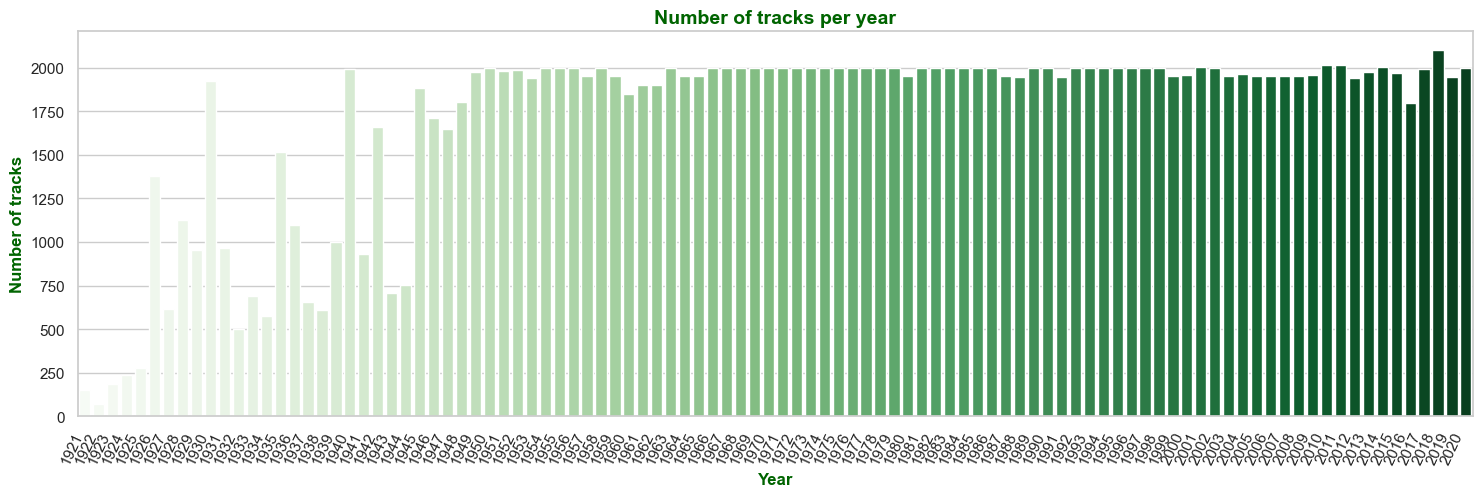

In [9]:
tracks_per_year = data.sort_values('year',ascending=False)
tracks_per_year = tracks_per_year['year'].value_counts()
tracks_per_year = tracks_per_year.sort_index()

song_plot = plt.figure(figsize=(18,5))

ax = sns.barplot(x=tracks_per_year.index , y=tracks_per_year.values, palette="Greens")
ax.set_xlabel('Year', c='#006400', fontsize=12,weight = 'bold')
ax.set_ylabel('Number of tracks', c='#006400', fontsize=12,weight = 'bold')
ax.set_title('Number of tracks per year', c='#006400', fontsize=14, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65,ha='right')
plt.show()

/var/folders/s8/jqj_q8kj2b7f950zcz5b092h0000gn/T/ipykernel_36846/55342151.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df= data.groupby('year')['acousticness','energy', 'danceability','instrumentalness','explicit'].mean().reset_index()


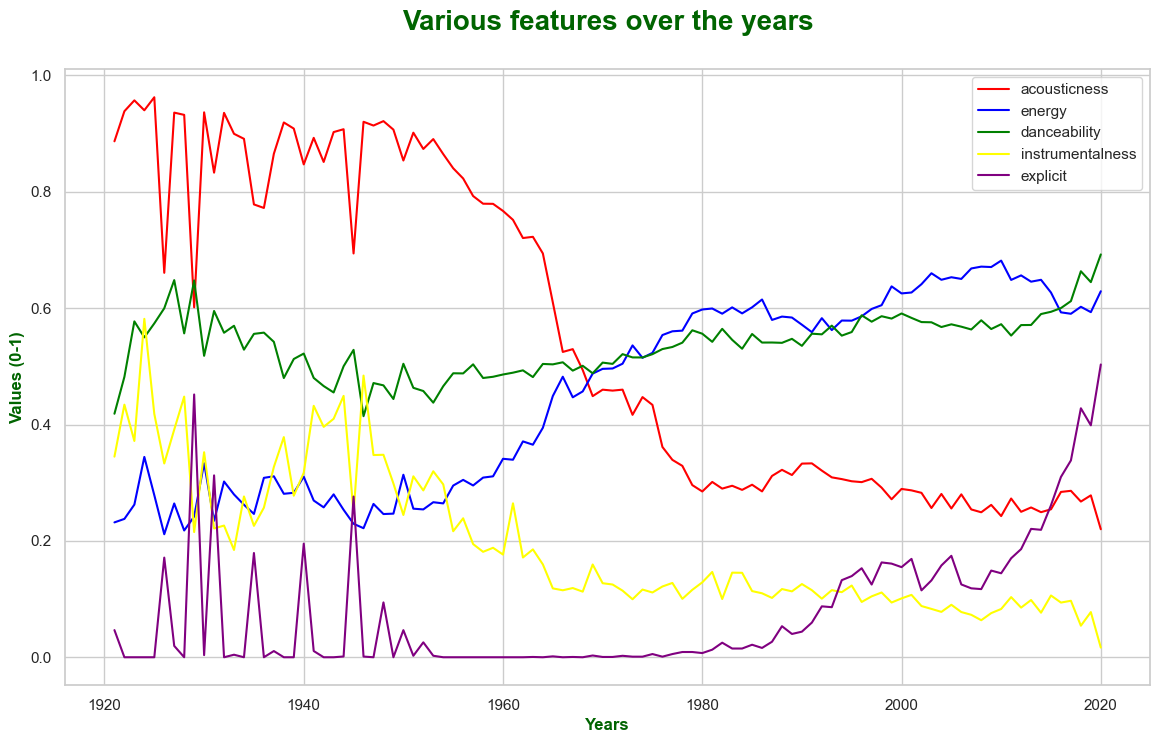

In [10]:
df= data.groupby('year')['acousticness','energy', 'danceability','instrumentalness','explicit'].mean().reset_index()
fig = plt.figure(figsize=(14,8))
plt.plot( 'year','acousticness',data=df,marker='',color='red', label ='acousticness' )
plt.plot( 'year','energy',data=df,marker='',color='blue',label ='energy')
plt.plot( 'year','danceability',data=df,marker='',color='green',label ='danceability')
plt.plot( 'year','instrumentalness',data=df,marker='',color='yellow',label ='instrumentalness')
plt.plot( 'year','explicit',data=df,marker='',color='purple',label ='explicit')

plt.title("Various features over the years",y=1.05,fontsize=20,  c='#006400', fontweight="bold")
plt.xlabel('Years',c='#006400', fontweight="bold")
plt.ylabel('Values (0-1)', c='#006400',fontweight="bold")
plt.legend()

Text(0, 0.5, 'Loudness (db)')

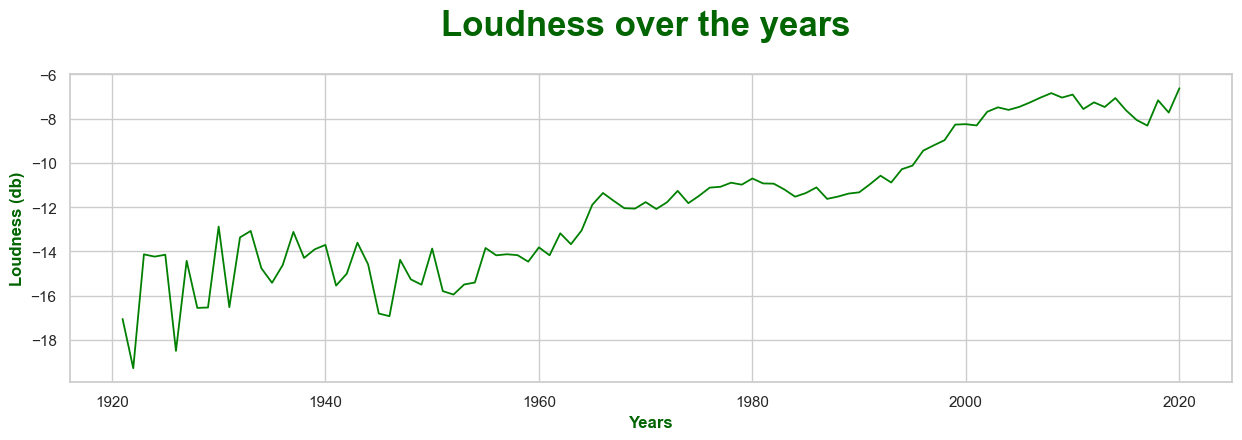

In [11]:
df= data.groupby('year')['loudness'].mean().reset_index()
fig = plt.figure(figsize=(15,4))
plt.plot( 'year','loudness',data=df,marker='',color='green',linewidth=1.3)
plt.title("Loudness over the years ",y=1.1,fontsize=25, c='#006400', fontweight="bold")
plt.xlabel('Years', c='#006400', fontweight="bold")
plt.ylabel('Loudness (db)', c='#006400',fontweight="bold")

Text(0, 0.5, 'Duration in minutes')

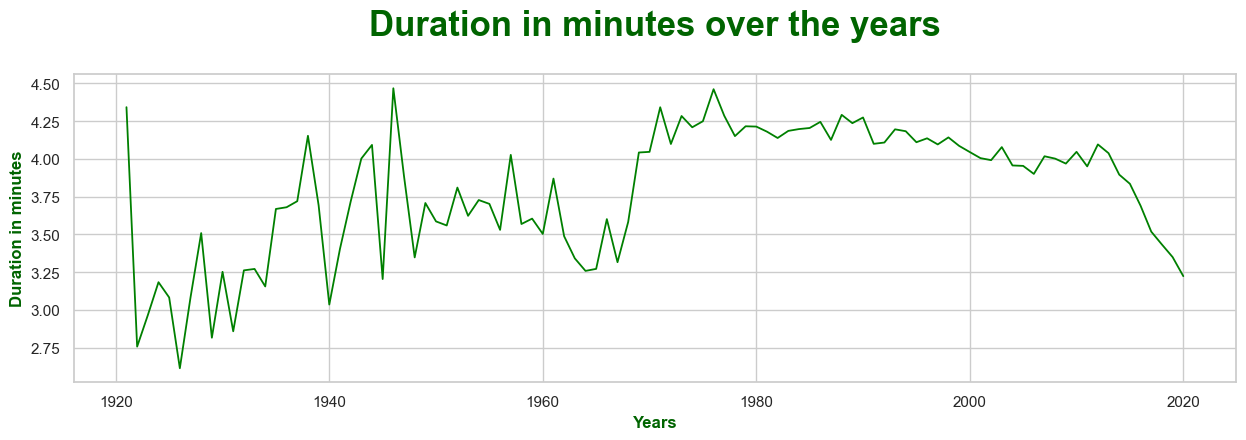

In [12]:
data['duration_min'] = data['duration_ms']/60000
df= data.groupby('year')['duration_min'].mean().reset_index()
fig = plt.figure(figsize=(15,4))
plt.plot( 'year','duration_min',data=df,marker='',color='green',linewidth=1.3)
plt.title("Duration in minutes over the years",y=1.1, c='#006400',fontsize=25, fontweight="bold")
plt.xlabel('Years', c='#006400', fontweight="bold")
plt.ylabel('Duration in minutes', c='#006400', fontweight="bold")


In [13]:
df = pd.read_csv("datasets/data_by_genres.csv")
df_w_genres = pd.read_csv("datasets/data_w_genres.csv")

def Convert(string): 
    li = list(string.split("'")) 
    return li 

l = []
for col in df_w_genres['genres']:
    z = Convert(col)
    l.append(z)
 
genres_list = []
for sublist in l:
    for item in sublist:
        genres_list.append(item)
items = Counter(genres_list).items()
l_sorted = Counter(genres_list).most_common()

item_1 = '['
item_2 = '[]'
item_3 = ']'
item_4 = ', '

def remove_items(g_list, item): 
      
    # remove the item for all its occurrences 
    for i in g_list: 
        if(i == item_1 or i == item_2 or i == item_3 or i == item_4): 
            g_list.remove(i)   
    return g_list 

res = remove_items(genres_list, item_1) 
res = remove_items(genres_list, item_2)
res = remove_items(genres_list, item_3)
res = remove_items(genres_list, item_4)
l_sorted = Counter(genres_list).most_common()

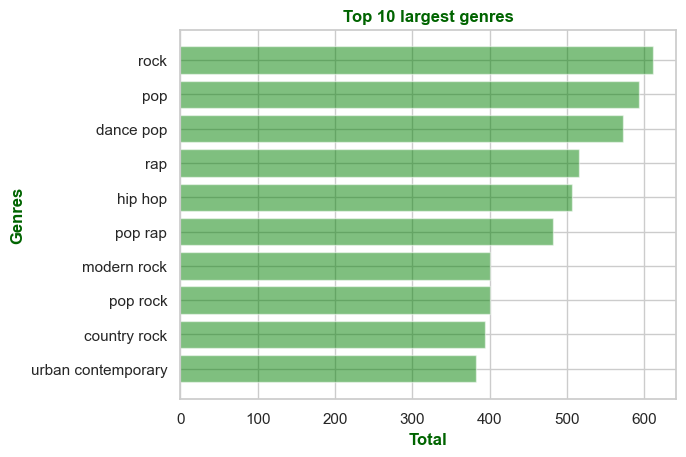

In [14]:
objects = [l_sorted[0][0], l_sorted[1][0], l_sorted[2][0], l_sorted[3][0],l_sorted[4][0],l_sorted[5][0],l_sorted[6][0],
l_sorted[7][0],l_sorted[8][0],l_sorted[9][0]]
objects.reverse()
y_pos = np.arange(len(objects))
performance = [l_sorted[0][1], l_sorted[1][1], l_sorted[2][1], l_sorted[3][1],l_sorted[4][1],l_sorted[5][1],l_sorted[6][1],
         l_sorted[7][1],l_sorted[8][1],l_sorted[9][1]]
performance.reverse()
plt.barh(y_pos, performance, align='center', alpha=0.5, color='green')
plt.yticks(y_pos, objects)
plt.xlabel('Total', c='#006400', fontweight='bold')
plt.ylabel('Genres', c='#006400', fontweight='bold')
plt.title('Top 10 largest genres', c='#006400', fontweight='bold')

plt.show()


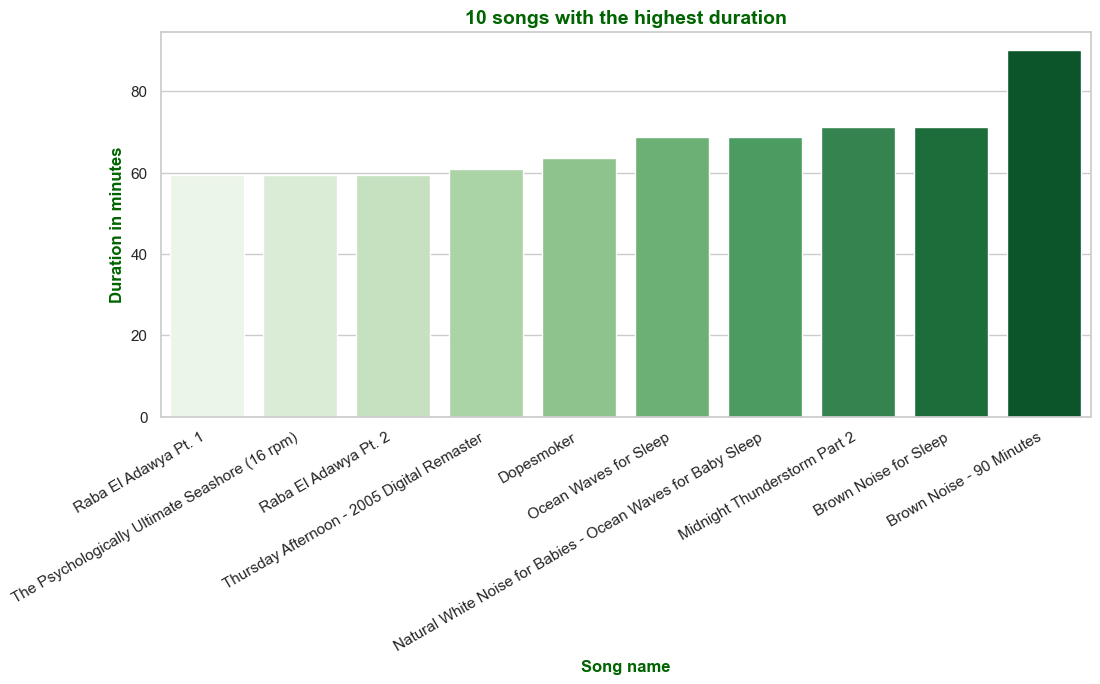

In [15]:
data['duration_min'] = data['duration_ms']/60000

highest_duration = data[['name','duration_min']].sort_values('duration_min',ascending = True).tail(10)
song_plot = plt.figure(figsize=(12,5))

ax = sns.barplot(x=highest_duration['name'], y=highest_duration['duration_min'], palette="Greens", data = highest_duration['duration_min'])
ax.set_xlabel('Song name', c='#006400', fontsize=12,weight = 'bold')
ax.set_ylabel('Duration in minutes', c='#006400', fontsize=12,weight = 'bold')
ax.set_title('10 songs with the highest duration', c='#006400', fontsize=14, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,ha='right')
plt.show()

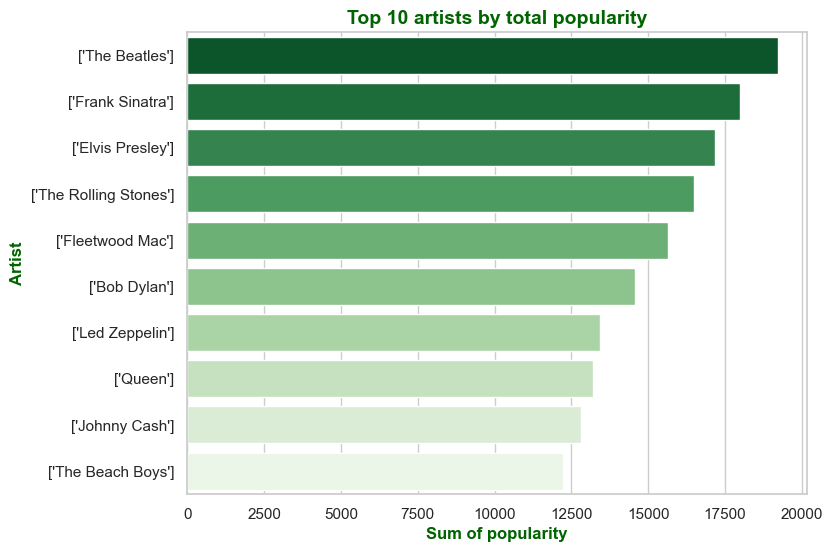

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
top_artists = data.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10)

ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette="Greens_r")
ax.set_xlabel('Sum of popularity', c='#006400', fontsize=12,weight = 'bold')
ax.set_ylabel('Artist', c='#006400', fontsize=12,weight = 'bold')
ax.set_title('Top 10 artists by total popularity', c='#006400', fontsize=14, weight = 'bold')
plt.show()

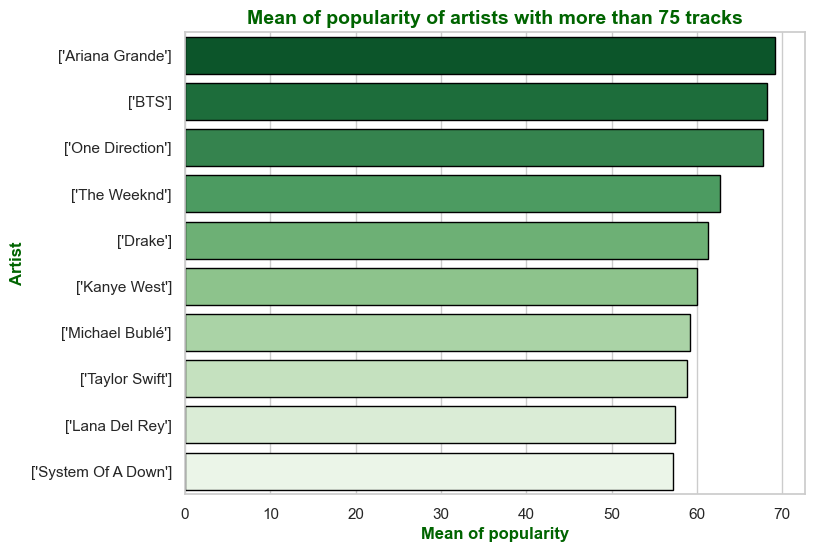

In [17]:
data['75_tracks'] = data['artists'].map(data['artists'].value_counts()>75)

most_populair_artist  = data.groupby(['artists', '75_tracks'])
most_populair_artist  = most_populair_artist['popularity'].mean().sort_values(ascending=False).reset_index(1)

tracks_true = most_populair_artist.loc[most_populair_artist['75_tracks'] == True]

fig, ax = plt.subplots(figsize = (8, 6))
tracks = tracks_true.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=tracks.values, y=tracks.index, palette="Greens_r", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Mean of popularity', c='#006400', fontsize=12,weight = 'bold')
ax.set_ylabel('Artist', c='#006400', fontsize=12,weight = 'bold')
ax.set_title('Mean of popularity of artists with more than 75 tracks', c='#006400', fontsize=14, weight = 'bold')
plt.show()

In [18]:
pop_10 = data.sort_values('popularity',ascending=False)

popularity_81_100 = pop_10[pop_10['popularity'].between(81, 100)]

popularity_61_80 = pop_10[pop_10['popularity'].between(61, 80)]

popularity_41_60 = pop_10[pop_10['popularity'].between(41, 60)]

popularity_21_40 = pop_10[pop_10['popularity'].between(21, 40)]

popularity_00_20 = pop_10[pop_10['popularity'].between(0, 20)]


In [19]:
popularity_between = ['00-20', '21-40', '41-60', '61-80', '81-100']

acousticness = [popularity_00_20['acousticness'].mean(), popularity_21_40['acousticness'].mean(), popularity_41_60['acousticness'].mean(), 
                popularity_61_80['acousticness'].mean(), popularity_81_100['acousticness'].mean()]

danceability = [popularity_00_20['danceability'].mean(), popularity_21_40['danceability'].mean(), popularity_41_60['danceability'].mean(), 
                popularity_61_80['danceability'].mean(), popularity_81_100['danceability'].mean()]

energy = [popularity_00_20['energy'].mean(), popularity_21_40['energy'].mean(), popularity_41_60['energy'].mean(), 
                popularity_61_80['energy'].mean(), popularity_81_100['energy'].mean()]

instrumentalness = [popularity_00_20['instrumentalness'].mean(), popularity_21_40['instrumentalness'].mean(), popularity_41_60['instrumentalness'].mean(), 
                popularity_61_80['instrumentalness'].mean(), popularity_81_100['instrumentalness'].mean()]

loudness = [popularity_00_20['loudness'].mean(), popularity_21_40['loudness'].mean(), popularity_41_60['loudness'].mean(), 
                popularity_61_80['loudness'].mean(), popularity_81_100['loudness'].mean()]

explicit = [popularity_00_20['explicit'].mean(), popularity_21_40['explicit'].mean(), popularity_41_60['explicit'].mean(), 
                popularity_61_80['explicit'].mean(), popularity_81_100['explicit'].mean()]


<Figure size 640x480 with 0 Axes>

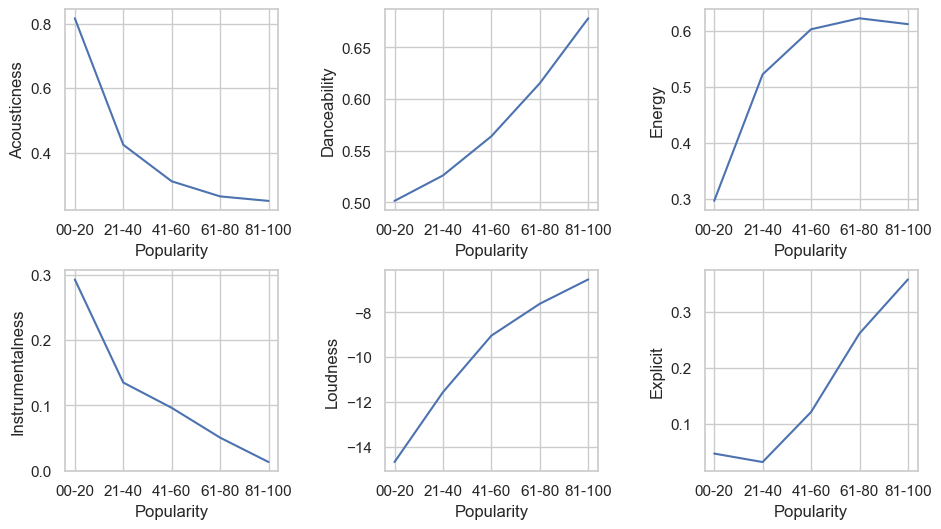

<Figure size 640x480 with 0 Axes>

In [20]:
fig, ax = plt.subplots(2,3 ,figsize=(11,6))
plt.subplots_adjust(wspace=0.5,hspace=0.3)
ax[0,0].plot(popularity_between,acousticness)
ax[0,0].set_xlabel('Popularity')
ax[0,0].set_ylabel('Acousticness')

ax[0,1].plot(popularity_between,danceability)
ax[0,1].set_xlabel('Popularity')
ax[0,1].set_ylabel('Danceability')

ax[0,2].plot(popularity_between,energy)
ax[0,2].set_xlabel('Popularity')
ax[0,2].set_ylabel('Energy')

ax[1,0].plot(popularity_between,instrumentalness)
ax[1,0].set_xlabel('Popularity')
ax[1,0].set_ylabel('Instrumentalness')

ax[1,1].plot(popularity_between,loudness)
ax[1,1].set_xlabel('Popularity')
ax[1,1].set_ylabel('Loudness')

ax[1,2].plot(popularity_between,explicit)
ax[1,2].set_xlabel('Popularity')
ax[1,2].set_ylabel('Explicit')

plt.figure()

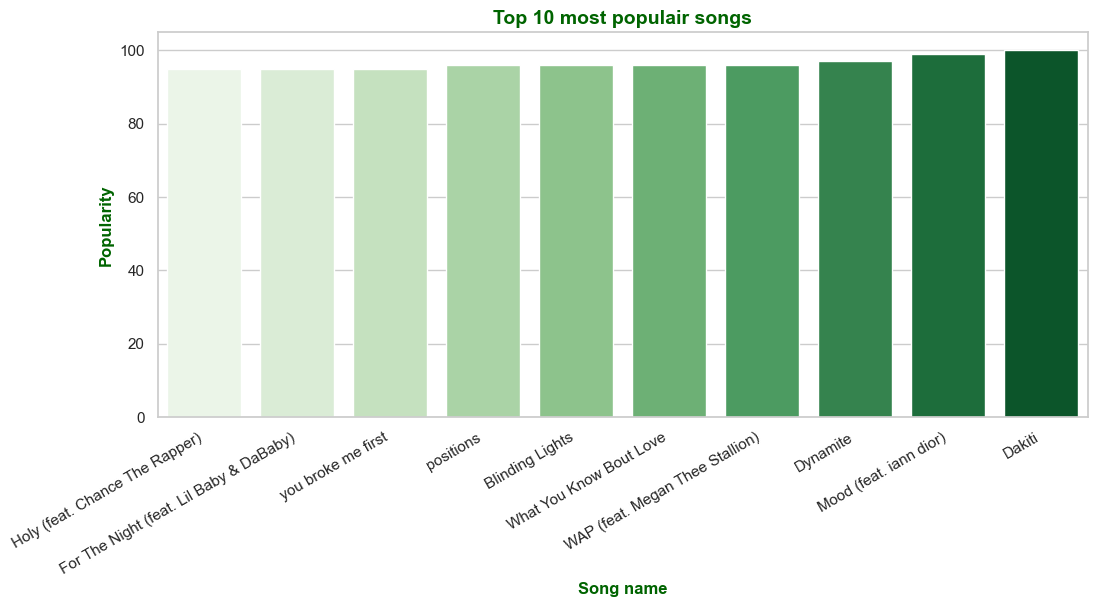

In [21]:
popularity = data[['name','popularity']].sort_values('popularity',ascending = True).tail(10)
song_plot = plt.figure(figsize=(12,5))

ax = sns.barplot(x=popularity['name'], y=popularity['popularity'], palette="Greens", data = popularity['popularity'])
ax.set_xlabel('Song name', c='#006400', fontsize=12,weight = 'bold')
ax.set_ylabel('Popularity', c='#006400', fontsize=12,weight = 'bold')
ax.set_title('Top 10 most populair songs', c='#006400', fontsize=14, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,ha='right')
plt.show()

In [22]:
popularity = data.sort_values('popularity',ascending = True).tail(10)

/var/folders/s8/jqj_q8kj2b7f950zcz5b092h0000gn/T/ipykernel_36846/2367636329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  acousticness_genre = popularity.mean()['acousticness']
/var/folders/s8/jqj_q8kj2b7f950zcz5b092h0000gn/T/ipykernel_36846/2367636329.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  danceability_genre = popularity.mean()['danceability']
/var/folders/s8/jqj_q8kj2b7f950zcz5b092h0000gn/T/ipykernel_36846/2367636329.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction

<Figure size 640x480 with 0 Axes>

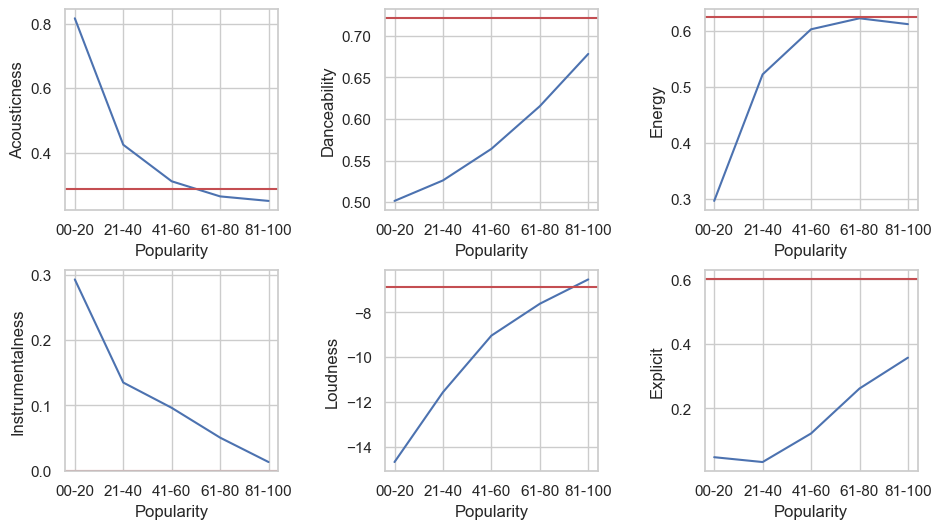

<Figure size 640x480 with 0 Axes>

In [23]:
acousticness_genre = popularity.mean()['acousticness']
danceability_genre = popularity.mean()['danceability']
energy_genre = popularity.mean()['energy']
instrumentalness_genre = popularity.mean()['instrumentalness']
loudness_genre = popularity.mean()['loudness']
explicit_genre = popularity.mean()['explicit']

fig, ax = plt.subplots(2,3 ,figsize=(11,6))
plt.subplots_adjust(wspace=0.5,hspace=0.3)
ax[0,0].plot(popularity_between,acousticness)
ax[0,0].axhline(y=acousticness_genre, color='r', linestyle='-')
ax[0,0].set_xlabel('Popularity')
ax[0,0].set_ylabel('Acousticness')

ax[0,1].plot(popularity_between,danceability)
ax[0,1].axhline(y=danceability_genre, color='r', linestyle='-')
ax[0,1].set_xlabel('Popularity')
ax[0,1].set_ylabel('Danceability')

ax[0,2].plot(popularity_between,energy)
ax[0,2].axhline(y=energy_genre, color='r', linestyle='-')
ax[0,2].set_xlabel('Popularity')
ax[0,2].set_ylabel('Energy')

ax[1,0].plot(popularity_between,instrumentalness)
ax[1,0].axhline(y=instrumentalness_genre, color='r', linestyle='-')
ax[1,0].set_xlabel('Popularity')
ax[1,0].set_ylabel('Instrumentalness')

ax[1,1].plot(popularity_between,loudness)
ax[1,1].axhline(y=loudness_genre, color='r', linestyle='-')
ax[1,1].set_xlabel('Popularity')
ax[1,1].set_ylabel('Loudness')

ax[1,2].plot(popularity_between,explicit)
ax[1,2].axhline(y=explicit_genre, color='r', linestyle='-')
ax[1,2].set_xlabel('Popularity')
ax[1,2].set_ylabel('Explicit')
plt.figure()

In [24]:
# acousticness_genre = data[data['name']== 'WAP (feat. iann dior)']
# acousticness_genre
popularity_final = data.sort_values('popularity',ascending = True).tail(10)
popularity_final

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,75_tracks
19615,0.3720,2020,0.19600,"['Justin Bieber', 'Chance the Rapper']",0.673,212093,0.704,0,0.000000,6,0.0898,-8.056,1,Holy (feat. Chance The Rapper),95,2020-09-18,0.3600,86.919,3.534883,False
19607,0.3470,2020,0.11400,"['Pop Smoke', 'Lil Baby', 'DaBaby']",0.823,190476,0.586,1,0.000000,6,0.1930,-6.606,0,For The Night (feat. Lil Baby & DaBaby),95,2020-07-03,0.2000,125.971,3.174600,False
19623,0.0799,2020,0.78600,['Tate McRae'],0.642,169266,0.374,0,0.000000,4,0.0906,-9.386,1,you broke me first,95,2020-04-17,0.0545,124.099,2.821100,False
19610,0.6820,2020,0.46800,['Ariana Grande'],0.737,172325,0.802,1,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,2.872083,True
19616,0.3340,2020,0.00146,['The Weeknd'],0.514,200040,0.730,0,0.000095,1,0.0897,-5.934,1,Blinding Lights,96,2020-03-20,0.0598,171.005,3.334000,True
19612,0.5430,2020,0.65000,['Pop Smoke'],0.709,160000,0.548,1,0.000002,10,0.1330,-8.493,1,What You Know Bout Love,96,2020-07-03,0.3530,83.995,2.666667,False
19608,0.3570,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073,3.125683,False
19618,0.7370,2020,0.01120,['BTS'],0.746,199054,0.765,0,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044,3.317567,True
19606,0.7560,2020,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989,2.342100,False
19611,0.1450,2020,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928,3.418167,False


In [25]:
# Dakiti
#  'Bad Bunny', 'Jhay Cortez'   ///  genres ['latin', 'reggaeton', 'trap latino'] 


# Mood (feat. iann dior)
# 24kGoldn //// genres  'cali rap'
# iann dior   //// genres melodic rap', 'pop rap'

# Dynamite
# BTS //// genres  ['k-pop', 'k-pop boy group']	

# WAP (feat. Megan Thee Stallion)
# Cardi B , Megan Thee Stallion //////  pop   rap 


# What You Know Bout Love
# Pop Smoke  ////// brooklyn drill

# Blinding Lights	
#  The Weeknd /////////////  canadian contemporary r&b', 'canadian pop', 'pop'

# positions
# Ariana Grande  ///////////'pop', 'post-teen pop'

# you broke me first 
#  Tate McRae   /////////  pop', 'post-teen pop'

# For The Night (feat. Lil Baby & DaBaby)	
# Lil Baby ///////////atl hip hop', 'atl trap', 'rap'
# DaBaby       ///////////////north carolina hip hop', 'rap'


# Holy (feat. Chance The Rapper)	
# 'Justin Bieber'     ////////////// canadian pop', 'pop', 'post-teen pop'
# 'Chance the Rapper' ///////////     'chicago rap', 'conscious hip hop', 'hip hop', 'pop rap', 'rap'
data_w_genres = pd.read_csv('datasets/data_w_genres.csv')
data_w_genres_test = data_w_genres[data_w_genres['artists']== 'Chance the Rapper']
data_w_genres_test

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
4177,"['chicago rap', 'conscious hip hop', 'hip hop'...",Chance the Rapper,0.272597,0.667197,233854.723684,0.554829,0.00002,0.189747,-7.924158,0.272392,112.584289,0.500447,61.486842,1,1,76
